# Task 3 - Evaluation of between-site batch effect removal - Baseline models

Author: Pia Rautenstrauch

Date: 2022-02-10

Computes batchASW on covariates sample and site, and (graph) iLISI on covariates sample and site.

In [1]:
# Imports
import os
import anndata as ad
import numpy as np
import pandas as pd
import scib
import scanpy as sc
import seaborn as sns

In [2]:
# Load metadata of baselines - Multiome
wd = "./embeddings/baseline/openproblems_bmmc_multiome_phase2/"

paths_to_baseline = [ f.path for f in os.scandir(wd)]
scenario = [ path.split("_phase2.")[1].split(".output.h5ad")[0] for path in paths_to_baseline ]

# baseline scenario to path to respective embedding mapping
scenario_path_mapping = dict(zip(scenario, paths_to_baseline))

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_21616/18224322.py:43: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_6w_a9s75/input.mtx /tmp/4952659.1.all.q/lisi_6w_a9s75/
/tmp/4952659.1.all.q/lisi_19td3qhb/input.mtx /tmp/4952659.1.all.q/lisi_19td3qhb/
/tmp/4952659.1.all.q/lisi_w8hi_7du/input.mtx /tmp/4952659.1.all.q/lisi_w8hi_7du/
baseline_mnn


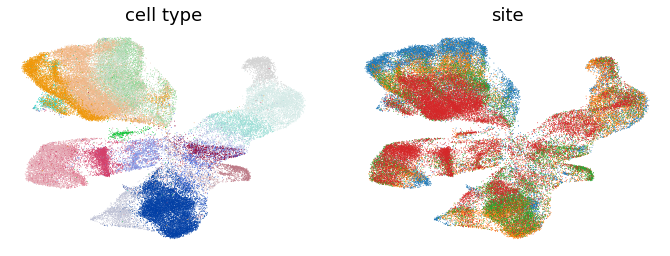

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_21616/18224322.py:43: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_eccozry7/input.mtx /tmp/4952659.1.all.q/lisi_eccozry7/
34360 has not enough neighbors.
34415 has not enough neighbors.
34480 has not enough neighbors.
33192 has not enough neighbors.
33222 has not enough neighbors.
33361 has not enough neighbors.
33455 has not enough neighbors.
33563 has not enough neighbors.
33584 has not enough neighbors.
33614 has not enough neighbors.
33630 has not enough neighbors.
33777 has not enough neighbors.
33907 has not enough neighbors.
33974 has not enough neighbors.
34154 has not enough neighbors.
/tmp/4952659.1.all.q/lisi_y9ldpyhn/input.mtx /tmp/4952659.1.all.q/lisi_y9ldpyhn/
34360 has not enough neighbors.
34415 has not enough neighbors.
34480 has not enough neighbors.
33192 has not enough neighbors.
33222 has not enough neighbors.
33361 has not enough neighbors.
33455 has not enough neighbors.
33563 has not enough neighbors.
33584 has not enough neighbors.
33614 has not enough neighbors.
33630 has not enough neighbors.
33777 

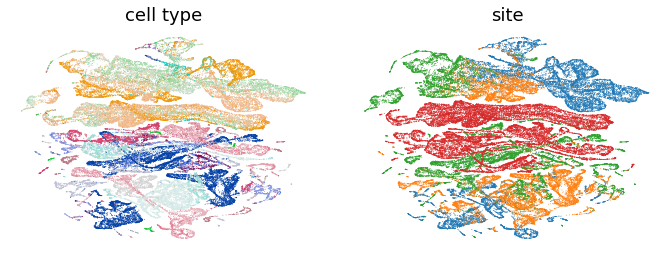

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_21616/18224322.py:43: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_n96880hb/input.mtx /tmp/4952659.1.all.q/lisi_n96880hb/
/tmp/4952659.1.all.q/lisi_j4hk6ymq/input.mtx /tmp/4952659.1.all.q/lisi_j4hk6ymq/
/tmp/4952659.1.all.q/lisi_eiaxdd_9/input.mtx /tmp/4952659.1.all.q/lisi_eiaxdd_9/
baseline_lmds


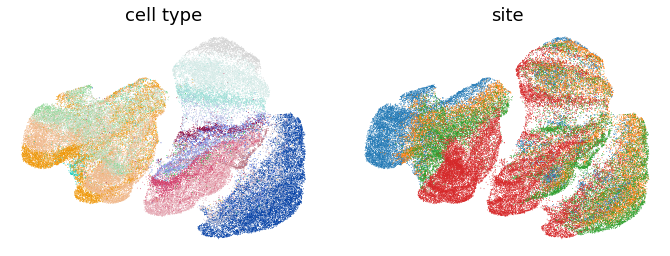

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_21616/18224322.py:43: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_a6bpkcz1/input.mtx /tmp/4952659.1.all.q/lisi_a6bpkcz1/
/tmp/4952659.1.all.q/lisi_en9_2ryz/input.mtx /tmp/4952659.1.all.q/lisi_en9_2ryz/
/tmp/4952659.1.all.q/lisi_2hdl5tse/input.mtx /tmp/4952659.1.all.q/lisi_2hdl5tse/
baseline_pca


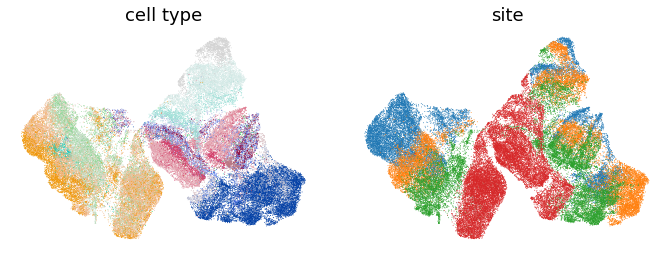

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_21616/18224322.py:43: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_f73h0vwc/input.mtx /tmp/4952659.1.all.q/lisi_f73h0vwc/
/tmp/4952659.1.all.q/lisi_5up5vo6a/input.mtx /tmp/4952659.1.all.q/lisi_5up5vo6a/
/tmp/4952659.1.all.q/lisi_muiylr0a/input.mtx /tmp/4952659.1.all.q/lisi_muiylr0a/
dummy_random


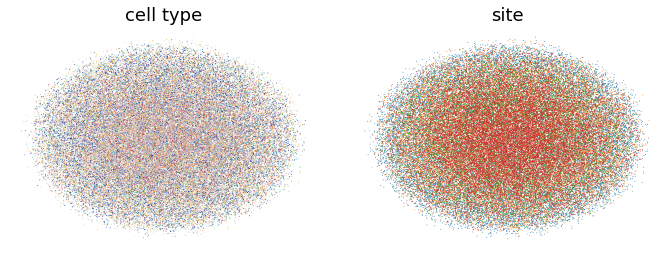

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_21616/18224322.py:43: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_rc_dk_da/input.mtx /tmp/4952659.1.all.q/lisi_rc_dk_da/
/tmp/4952659.1.all.q/lisi_vsld4sfz/input.mtx /tmp/4952659.1.all.q/lisi_vsld4sfz/
/tmp/4952659.1.all.q/lisi_bnhwn6ie/input.mtx /tmp/4952659.1.all.q/lisi_bnhwn6ie/
dummy_zeros


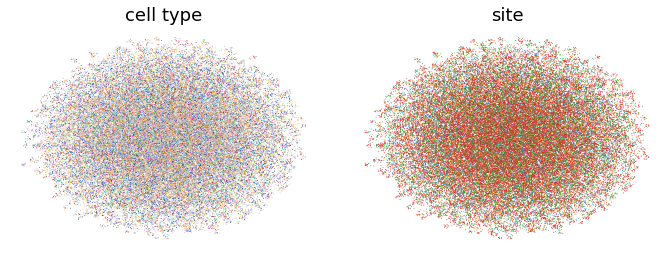

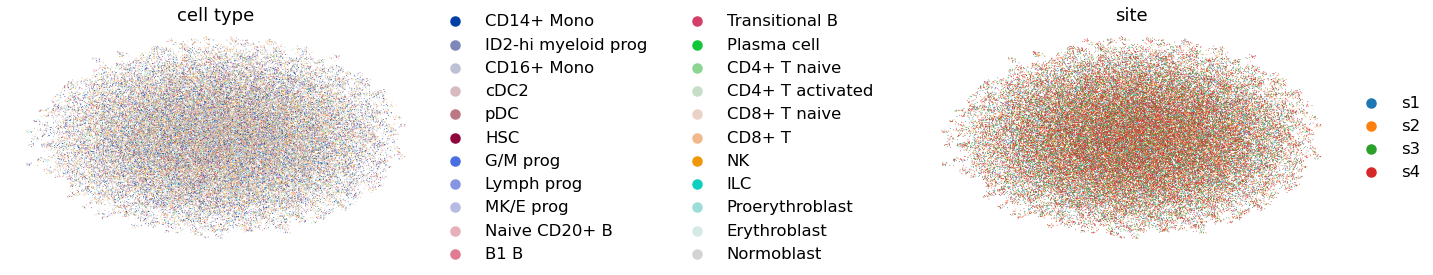

In [3]:
np.random.seed(61)

# Collect computed scores, nested dict is simple to convert to pd.DataFrame
score_dict = {}

# team here is the baseline scenario name
for team, path in scenario_path_mapping.items():
    # Initialize nested dict
    score_dict[team] = {}
    
    # Read embeddings
    # If available use embedding used for method ranking in the challenge (some methods can result in variable outputs, and no use of random seeds was enforced)
    embedding = ad.read_h5ad(path)

    # How many dimensions does embedding have
    score_dict[team]['dims'] = embedding.X.shape[1]
    
    
    # Compute neighbors 
    embedding.obsm['X_emb'] = embedding.X.copy()

    sc.pp.neighbors(embedding, use_rep='X_emb')
    sc.tl.umap(embedding)
    
    # Load metadata (cell type information)
    solution = ad.read_h5ad("./solution/openproblems_bmmc_multiome_phase2.censor_dataset.output_solution.h5ad")
    
    # Make sure order is the same as for the embedding
    solution = solution[embedding.obs.index,:].copy()
    
    # Transfer batch information and cell type labels to embedding
    embedding.obs['batch'] = solution.obs['batch']
    embedding.obs["cell_type"] = solution.obs['cell_type']
    
    ### Rename cell_type
    embedding.obs.rename({'cell_type': 'cell type'}, axis=1, inplace=True)
    
    # Unify color scheme across figures for publication
    # make sure cell type it's categorical
    embedding.obs['cell type'] = embedding.obs['cell type'].astype('category')

    # order them
    embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog', 
                                                  'MK/E prog', 'Naive CD20+ B', 'B1 B', 'Transitional B', 'Plasma cell', 'CD4+ T naive', 'CD4+ T activated', 
                                                  'CD8+ T naive', 'CD8+ T', 'NK', 'ILC', 'Proerythroblast', 'Erythroblast','Normoblast'], inplace=True)

    # Pick colors and put into uns
    cols = ['#023fa5', '#7d87b9', '#bec1d4', '#d6bcc0', '#bb7784',
        '#8e063b', '#4a6fe3', '#8595e1', '#b5bbe3', '#e6afb9',
        '#e07b91', '#d33f6a', '#11c638', '#8dd593', '#c6dec7',
        '#ead3c6', '#f0b98d', '#ef9708', '#0fcfc0', '#9cded6',
        '#d5eae7', '#d3d3d3']
    
    
    embedding.uns['cell type_colors'] = cols
    
    
    # Compute scores
    ## Level of evaluation: batch/sample
    ### graph iLISI and cLISI on variable batch
    score_dict[team]['iLISI_batch'], score_dict[team]['cLISI_full'] =  scib.me.lisi.lisi_graph(embedding, batch_key='batch', label_key='cell type', multiprocessing=True)
    
    ### asw_batch
    score = scib.me.silhouette_batch(
        embedding,
        batch_key='batch',
        group_key='cell type',
        embed='X_emb',
        verbose=False
    )

    score_dict[team]['asw_batch'] = score
      
    ## Level of evaluation: site
    embedding.obs['site'] = embedding.obs['batch'].apply(lambda x: x.split('d')[0]).astype("category")

    ### graph iLISI and cLISI on variable site (stratify batches by site)
    score_dict[team]['iLISI_site'] =  scib.me.lisi.ilisi_graph(embedding, batch_key='site', multiprocessing=True)

    ### asw_site
    score_site = scib.me.silhouette_batch(
        embedding,
        batch_key='site',
        group_key='cell type',
        embed='X_emb',
        verbose=False
    )

    score_dict[team]['asw_batch_site'] = score_site

    ### Save UMAP visualization as png for PMLR report figure
    print('{}'.format(team))
    sc.pl.umap(
        embedding,
        color=['cell type', 'site'],
        size=3,
        frameon=False,
        ncols=2,
        legend_loc=None,
        wspace=0.0,
        save="_{}_multiome.png".format(team)
    )
    
# Store legend once for figures   
sc.pl.umap(
    embedding,
    color=['cell type', 'site'],
    size=3,
    frameon=False,
    ncols=2,
    wspace=1,
    save="_{}_multiome_legend.png".format(team)
)   

In [4]:
pd.DataFrame(score_dict).to_csv("novel_batch_removal_scores_baselines.csv", index=True)